### Importation of the module

In [1]:
import sys
sys.path.append('../')

from main import *

### Creation of the linear model

In [2]:
momo = MODEL()

momo.creat_linear(4)

momo.enzymes.add_to_all_reaction()
momo.parameters.add_enzymes()

momo.parameters.add_externals()

momo.elasticity.s.half_satured()

Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction
Model created 
 
To add metabolite, use .metabolites.add_meta 
To add reaction,   use .reactions.add_reaction


In [3]:
momo.metabolites

        External  Concentration (mmol/gDW)
meta_0      True                         1
meta_1     False                         1
meta_2     False                         1
meta_3      True                         1

In [4]:
momo.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


In [5]:
momo.operons.add("lactose", ["enzyme_reaction_0", "enzyme_reaction_1"], 1.)

In [6]:
momo.operons.df

,Enzymes linked,Mixed covariance,Activated
lactose,"[enzyme_reaction_0_para, enzyme_reaction_1_para]",1.0,True


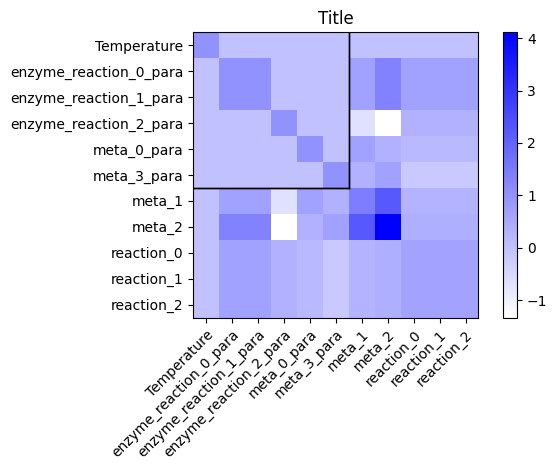

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Title'}>,
 <matplotlib.image.AxesImage at 0x7f79accbf820>)

In [7]:

momo.plot(result="cov", title="Title", label=True)

### You can then begin the analysis of the model

In [8]:
momo.MI

/home/alequertier/Documents/BadAss/Notebooks/../main.py:589: RuntimeWarning: divide by zero encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__corelation[i][j] ** 2)
/home/alequertier/Documents/BadAss/Notebooks/../main.py:589: RuntimeWarning: invalid value encountered in log
  MI[i][j] = -0.5 * np.log(1 - self.__corelation[i][j] ** 2)


,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
Temperature,inf,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
enzyme_reaction_0_para,-0.0,inf,inf,-0.000000,-0.000000,-0.000000,0.183862,0.283198,0.649641,0.649641,0.649641
enzyme_reaction_1_para,-0.0,inf,inf,-0.000000,-0.000000,-0.000000,0.183862,0.283198,0.649641,0.649641,0.649641
enzyme_reaction_2_para,-0.0,-0.000000,-0.000000,inf,-0.000000,-0.000000,0.183862,0.283198,0.100335,0.100335,0.100335
meta_0_para,-0.0,-0.000000,-0.000000,-0.000000,inf,-0.000000,0.183862,0.013699,0.023260,0.023260,0.023260
meta_3_para,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,inf,0.040021,0.057205,0.023260,0.023260,0.023260
meta_1,-0.0,0.183862,0.183862,0.183862,0.183862,0.040021,inf,0.890709,0.045736,0.045736,0.045736
meta_2,-0.0,0.283198,0.283198,0.283198,0.013699,0.057205,0.890709,inf,0.031042,0.031042,0.031042
reaction_0,-0.0,0.649641,0.649641,0.100335,0.023260,0.023260,0.045736,0.031042,inf,inf,inf
reaction_1,-0.0,0.649641,0.649641,0.100335,0.023260,0.023260,0.045736,0.031042,NaN,inf,inf


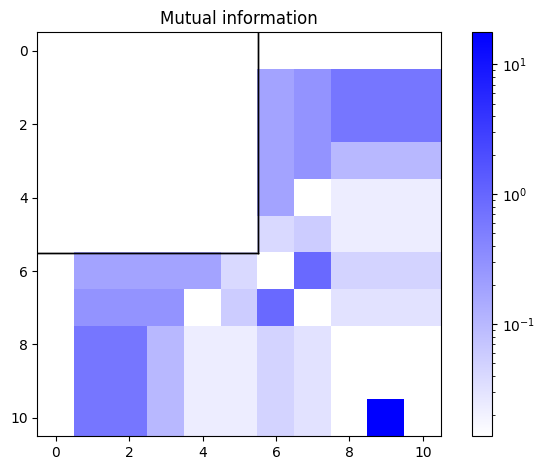

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Mutual information'}>,
 <matplotlib.image.AxesImage at 0x7f79aaaf5390>)

In [9]:
momo.plot(result="MI")

### You can add regulation arrows

In [10]:
momo.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux (mmol/gDW/h)
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,,1
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,,1
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,,1


#### Exernite metabolite too ?

In [11]:
momo.regulations.add(name="regu_alo", regulated="reaction_1", regulator="meta_2", allosteric=True)

In [12]:
momo.regulations.add(name="regu_transcri", regulated="reaction_1", regulator="meta_2", allosteric=False)

In [13]:
momo.regulations.df

,Regulated flux,Regulator,Coefficient of regulation,Type regulation,Activated
regu_alo,reaction_1,meta_2,1,allosteric,True
regu_transcri,reaction_1,meta_2,1,transcriptional,True


#### You can also study periodic perturbation

In [14]:
momo.frequency_omega = 1.0

In [15]:
momo.Jacobian

,meta_1,meta_2,enzyme_regu_transcri
meta_1,-1.000000e+00-1.000000e+00j,-0.5+0.0j,0.0+0.0j
meta_2,5.000000e-01+0.000000e+00j,-0.0-1.0j,0.0+0.0j
enzyme_regu_transcri,2.775558e-16+0.000000e+00j,1.0+0.0j,0.0-1.0j


#### You can also study temporal control coefficients

In [16]:
momo.frequency_omega = 0.0

In [17]:
momo.temporal_C_s_p(t=1)

array([[ 0.55972788, -0.83374146,  0.27401359, -0.02340139,  0.02340139],
       [-0.22246844,  0.38406222, -0.16159378, -0.20143823,  0.20143823],
       [-0.22958199,  0.13123405,  0.09834793,  0.85255571, -0.85255571]])

In [18]:
momo.temporal_R_s_p(t=1)

array([[ 0.        ,  0.55972788, -0.83374146,  0.27401359,  0.27986394,
        -0.13700679],
       [ 0.        , -0.22246844,  0.38406222, -0.16159378, -0.11123422,
         0.08079689],
       [ 0.        , -0.22958199,  0.13123405,  0.09834793, -0.11479099,
        -0.04917397]])

#### Thermodynamic sampling of the elsaticity coefficient

In [19]:
momo.elasticity.s.fill_sub_elasticity()

In [20]:
momo.elasticity.s.df

,meta_1,meta_2,enzyme_regu_transcri
reaction_0,0.361105,-0.943824,-0.463067
reaction_1,-0.320613,0.342710,-0.537481
reaction_2,-0.037925,0.155719,0.705026
creation_regu_transcri,0.236389,-0.477382,-0.222251
destruction_regu_transcri,-0.940745,0.732400,0.360493


#### It is possible to study group of variable

In [21]:
momo.covariance

,Temperature,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,enzyme_regu_transcri,reaction_0,reaction_1,reaction_2,creation_regu_transcri,destruction_regu_transcri
Temperature,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
enzyme_reaction_0_para,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.836675,0.483090,0.687172,0.527969,0.527969,0.527969,-0.185562,-0.185562
enzyme_reaction_1_para,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.836675,0.483090,0.687172,0.527969,0.527969,0.527969,-0.185562,-0.185562
enzyme_reaction_2_para,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,-0.836675,-0.483090,-0.687172,0.472031,0.472031,0.472031,0.185562,0.185562
meta_0_para,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.803120,0.810693,-0.060716,0.052975,0.052975,0.052975,-0.183668,-0.183668
meta_3_para,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.418338,0.241545,0.343586,-0.236015,-0.236015,-0.236015,-0.092781,-0.092781
meta_1,0.0,0.836675,0.836675,-0.836675,0.803120,0.418338,2.220058,1.560509,1.244852,-0.009386,-0.009386,-0.009386,-0.496832,-0.496832
meta_2,0.0,0.483090,0.483090,-0.483090,0.810693,0.241545,1.560509,1.182318,0.697701,0.012962,0.012962,0.012962,-0.350595,-0.350595
enzyme_regu_transcri,0.0,0.687172,0.687172,-0.687172,-0.060716,0.343586,1.244852,0.697701,1.066148,-0.045869,-0.045869,-0.045869,-0.275753,-0.275753
reaction_0,0.0,0.527969,0.527969,0.472031,0.052975,-0.236015,-0.009386,0.012962,-0.045869,0.560074,0.560074,0.560074,0.001788,0.001788


In [22]:
momo.group_MI(groups=[["meta_1", "reaction_0"],["meta_3_para","meta_0_para"]])

,0,1
0,inf,0.287208
1,0.287208,inf


#### We can also fix value

In [23]:
momo.parameters.remove("Temperature")

Name of the removed parameter : Temperature


In [24]:
momo.covariance

,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_0_para,meta_3_para,meta_1,meta_2,enzyme_regu_transcri,reaction_0,reaction_1,reaction_2,creation_regu_transcri,destruction_regu_transcri
enzyme_reaction_0_para,1.000000,1.000000,0.000000,0.000000,0.000000,0.836675,0.483090,0.687172,0.527969,0.527969,0.527969,-0.185562,-0.185562
enzyme_reaction_1_para,1.000000,1.000000,0.000000,0.000000,0.000000,0.836675,0.483090,0.687172,0.527969,0.527969,0.527969,-0.185562,-0.185562
enzyme_reaction_2_para,0.000000,0.000000,1.000000,0.000000,0.000000,-0.836675,-0.483090,-0.687172,0.472031,0.472031,0.472031,0.185562,0.185562
meta_0_para,0.000000,0.000000,0.000000,1.000000,0.000000,0.803120,0.810693,-0.060716,0.052975,0.052975,0.052975,-0.183668,-0.183668
meta_3_para,0.000000,0.000000,0.000000,0.000000,1.000000,0.418338,0.241545,0.343586,-0.236015,-0.236015,-0.236015,-0.092781,-0.092781
meta_1,0.836675,0.836675,-0.836675,0.803120,0.418338,2.220058,1.560509,1.244852,-0.009386,-0.009386,-0.009386,-0.496832,-0.496832
meta_2,0.483090,0.483090,-0.483090,0.810693,0.241545,1.560509,1.182318,0.697701,0.012962,0.012962,0.012962,-0.350595,-0.350595
enzyme_regu_transcri,0.687172,0.687172,-0.687172,-0.060716,0.343586,1.244852,0.697701,1.066148,-0.045869,-0.045869,-0.045869,-0.275753,-0.275753
reaction_0,0.527969,0.527969,0.472031,0.052975,-0.236015,-0.009386,0.012962,-0.045869,0.560074,0.560074,0.560074,0.001788,0.001788
reaction_1,0.527969,0.527969,0.472031,0.052975,-0.236015,-0.009386,0.012962,-0.045869,0.560074,0.560074,0.560074,0.001788,0.001788


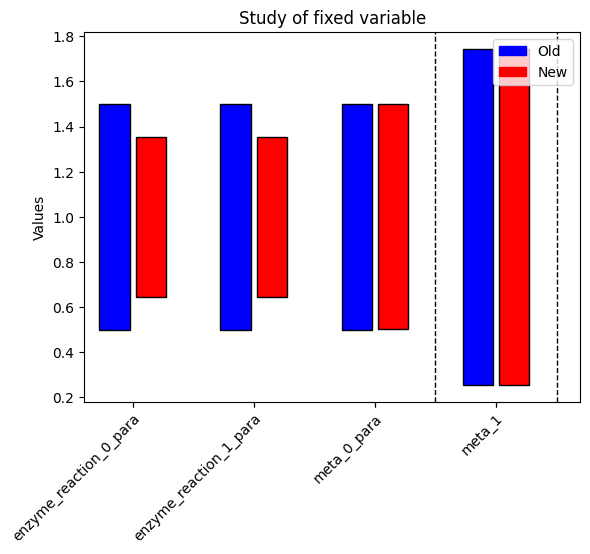

In [25]:
momo.boxplot(elements_to_fixe=["reaction_2"], elements_to_study=["enzyme_reaction_0_para", "enzyme_reaction_1_para", "meta_0_para", "meta_1"])

AttributeError: 'FigureManagerBase' object has no attribute 'window'

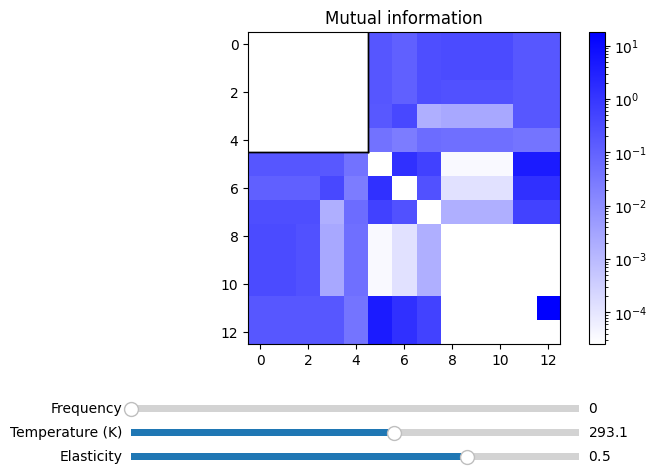

In [26]:
momo.graphic_interface()